[*********************100%***********************]  1 of 1 completed


C:\Users\barna\AppData\Local\Temp\ipykernel_10868\1162320645.py:10: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T-t)))*(np.log(S/K) + (r + 0.5*sigma**2)*(T-t))
C:\Users\barna\AppData\Local\Temp\ipykernel_10868\1162320645.py:15: RuntimeWarning: divide by zero encountered in log
  d1 = (1/(sigma*np.sqrt(T-t)))*(np.log(S/K) + (r + 0.5*sigma**2)*(T-t))


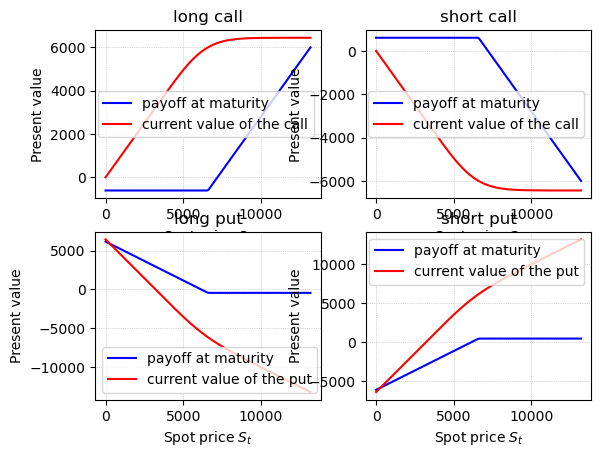

In [9]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

N = norm.cdf

def bs_call(S, K, t, T, r, sigma) -> float:
    d1 = (1/(sigma*np.sqrt(T-t)))*(np.log(S/K) + (r + 0.5*sigma**2)*(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    return S*N(d1) - K*np.exp(-r*(T-t))*N(d2)

def bs_put(S, K, t, T, r, sigma) -> float:
    d1 = (1/(sigma*np.sqrt(T-t)))*(np.log(S/K) + (r + 0.5*sigma**2)*(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    return -S*N(-d1) + K*np.exp(-r*(T-t))*N(-d2)
 
def long_call(S, K, bs_premium) -> np.ndarray:
    return np.maximum((S-K),0) - bs_premium
 
def long_put(S, K, bs_premium) -> np.ndarray:
    return np.maximum((K-S),0) - bs_premium
 
def short_call(S, K, bs_premium) -> np.ndarray:
    return -np.array([i for i in long_call(S,K,bs_premium)])

def short_put(S,K, bs_premium) -> np.ndarray:
    return -np.array([i for i in long_put(S,K,bs_premium)])


def plot_payoff(
        S: np.ndarray,
        K: float,
        T: float,
        r: float,
        sigma: float,
        pos="long",
        option="call")->None:
    """Plots the payoff of a position on an option
    Args:
        S (np.ndarray): Spot price
        K (float): Strike price
        T (float): Maturity
        r (float): risk free rate
        sigma (float): implied volatility
        pos (str, optional): Position type. Defaults to "long".
        option (str, optional): Option type. Defaults to "call".
    """

    if option=="call":
        if pos=="long":
            payoff = long_call(S, K, bs_call(K, K, 0, T, r, sigma))
            current_value = [St - bs_call(St, K, 0, T, r, sigma) for St in S]

        elif pos=="short":
            payoff = short_call(S, K, bs_call(K, K, 0, T, r, sigma))
            current_value = [bs_call(St, K, 0, T, r, sigma) - St for St in S]

        else:
            ValueError("Position must be long or short.")

    elif option=="put":
        if pos=="long":
            payoff = long_put(S, K, bs_put(K, K, 0, T, r, sigma))
            current_value = [bs_put(St, K, 0, T, r, sigma) - St for St in S]

        elif pos=="short":
            payoff = short_put(S, K, bs_put(K, K, 0, T, r, sigma))
            current_value = [-bs_put(St, K, 0, T, r, sigma) + St for St in S]

        else:
            ValueError("Position must be long or short.")

    else:
        ValueError("Option must be call or put.")

 

    plt.plot(S, payoff, label="payoff at maturity", color="blue")
    plt.plot(S, current_value, label=f"current value of the {option}", color="red")
    plt.grid(axis='both', linestyle='dotted', lw=0.5)
    plt.xlabel("Spot price $S_t$")
    plt.ylabel("Present value")
    plt.legend()
    plt.title(f"{pos} {option}")
    # plt.show()

 

T = 1.0          # Maturity
r = 0.025        # risk free rate
sigma = 0.2      # implied volatility
ticker = "^FCHI" # CAC40
data = yf.download(ticker, datetime(2023,1,1), datetime(2023,1,10))
K = float(data.head(1)["Close"]) 

S = np.linspace(0, 2*K, 150)
fig,ax = plt.subplots(nrows=2, ncols=2)

plt.subplot(221)
plot_payoff(S,K,T,r,sigma)
plt.subplot(222)
plot_payoff(S,K,T,r,sigma, "short")
plt.subplot(223)
plot_payoff(S,K,T,r,sigma, "long", "put")
plt.subplot(224)
plot_payoff(S,K,T,r,sigma, "short", "put")
plt.show()

# https://clinthoward.github.io/portfolio/2017/04/16/BlackScholesGreeks/

C:\Users\barna\AppData\Local\Temp\ipykernel_1732\1596876754.py:9: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


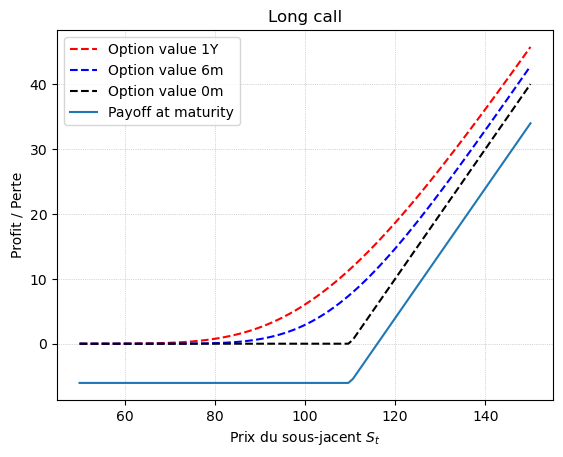

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the Black-Scholes call option pricing formula


def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    call = S * N_d1 - K * np.exp(-r * T) * N_d2
    return call


# Define the option parameters
S = 100  # underlying asset price
K = 110  # strike price
T = 1  # time to maturity (in years)
r = 0.05  # risk-free interest rate
sigma = 0.2  # volatility

# Calculate the option value using the Black-Scholes model
option_value = black_scholes_call(S, K, T, r, sigma)

# Create an array of underlying asset prices
prices = np.linspace(50, 150, 100)

# Calculate the option value and payoff at maturity for each underlying asset price
option_values = black_scholes_call(prices, K, T, r, sigma)
option_values2 = black_scholes_call(prices, K, 0.5, r, sigma)
option_values3 = black_scholes_call(prices, K, 0.0, r, sigma)
payoff = np.maximum(prices - K, 0) - option_value

# Plot the option value and payoff as a function of the underlying asset price
plt.plot(prices, option_values, '--', label='Option value 1Y', color="red")
plt.plot(prices, option_values2, '--', label='Option value 6m', color="blue")
plt.plot(prices, option_values3, '--', label='Option value at maturity', color="black")
plt.plot(prices, payoff, label='Payoff at maturity')
plt.xlabel('Prix du sous-jacent $S_t$')
plt.ylabel('Profit / Perte')
plt.title('Long call')
plt.grid(axis='both', linestyle='dotted', lw=0.5)
plt.legend()
plt.show()


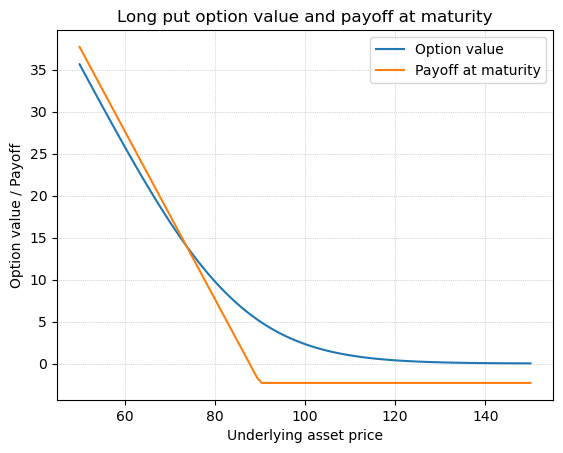

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the Black-Scholes put option pricing formula


def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_neg_d1 = norm.cdf(-d1)
    N_neg_d2 = norm.cdf(-d2)
    put = K * np.exp(-r * T) * N_neg_d2 - S * N_neg_d1
    return put


# Define the option parameters
S = 100  # underlying asset price
K = 90  # strike price
T = 1  # time to maturity (in years)
r = 0.05  # risk-free interest rate
sigma = 0.2  # volatility

# Calculate the option value using the Black-Scholes model
option_value = black_scholes_put(S, K, T, r, sigma)

# Create an array of underlying asset prices
prices = np.linspace(50, 150, 100)

# Calculate the option value and payoff at maturity for each underlying asset price
option_values = black_scholes_put(prices, K, T, r, sigma)
payoff = np.maximum(K - prices, 0) - option_value

# Plot the option value and payoff as a function of the underlying asset price
plt.plot(prices, option_values, label='Option value')
plt.plot(prices, payoff, label='Payoff at maturity')
plt.xlabel('Underlying asset price')
plt.ylabel('Option value / Payoff')
plt.title('Long put option value and payoff at maturity')
plt.grid(axis='both', linestyle='dotted', lw=0.5)
plt.legend()
plt.show()


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings 
# from .helpers import check_optype, check_trtype

# warnings.filterwarnings('ignore')

abb={'c': 'Call',
    'p': 'Put',
    'b': 'Long',
    's': 'Short'}

def single_plotter(op_type='c',spot=100, spot_range=10,strike=102,tr_type='b',op_pr=2, save=False, file='fig.png'):

    op_type=str.lower(op_type)
    tr_type=str.lower(tr_type)
    
    def payoff_calculator():
        x=spot*np.arange(100-spot_range,101+spot_range,0.01)/100
        
        y=[]
        if str.lower(op_type)=='c':
            for i in range(len(x)):
                y.append(max((x[i]-strike-op_pr),-op_pr))
        else:
            for i in range(len(x)):
                y.append(max(strike-x[i]-op_pr,-op_pr))

        if str.lower(tr_type)=='s':
            y=-np.array(y)
        return x,y
        
    x,y=payoff_calculator()
    y0=np.zeros_like(x)
    
    def plotter(x,y):
        # plt.figure(figsize=(10,6))
        sns.lineplot(x=x, y=y)
        plt.axhline(color='k', lw=0.5)
        # plt.axvline(x=spot, color='r', linestyle='--')
        title=str(abb[tr_type])+' '+str(abb[op_type])
        plt.fill_between(x, y, 0, alpha=0.2, where=y>y0, facecolor='green', interpolate=True)
        plt.fill_between(x, y, 0, alpha=0.2, where=y<y0, facecolor='red', interpolate=True)
        plt.title(title)
        plt.tight_layout()
        plt.grid(axis='both', linestyle='dotted', lw=0.5)
        plt.show()
    
    plotter(x,y)

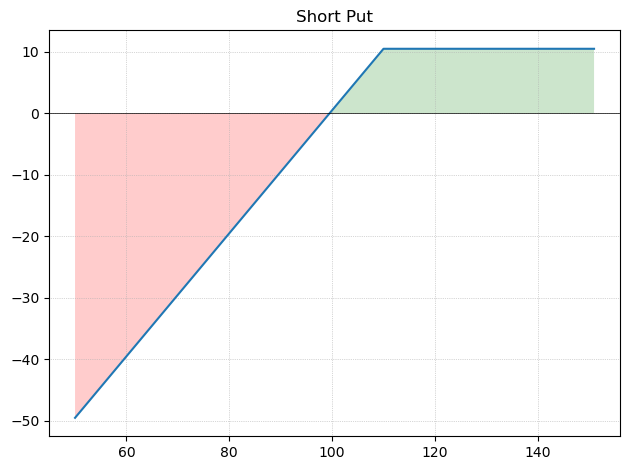

In [62]:
import opstrat as op
single_plotter(spot=100, strike=110, spot_range=50, op_type='p', tr_type='s', op_pr=10.5)

In [6]:

import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize_scalar   
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)    
    

def implied_vol(opt_value, S, K, T, r, type_='call'):
    
    def call_obj(sigma):
        return abs(BS_CALL(S, K, T, r, sigma) - opt_value)
    
    def put_obj(sigma):
        return abs(BS_PUT(S, K, T, r, sigma) - opt_value)
    
    if type_ == 'call':
        res = minimize_scalar(call_obj, bounds=(0.01,6), method='bounded')
        return res.x
    elif type_ == 'put':
        res = minimize_scalar(put_obj, bounds=(0.01,6),
                              method='bounded')
        return res.x
    else:
        raise ValueError("type_ must be 'put' or 'call'")
        

In [10]:
import yfinance as yf

from pandas.io.data import Options
ticker='IBM'
x = Options(ticker)
calls, puts = x.get_options_data()

tsla = yf.Ticker('TSLA')  
exps = tsla.options  #expiration dates
calls = tsla.get_call_data()

calls.reset_index(inplace=True)
calls['mid'] = (calls.Bid + calls.Ask)/2
calls['Time'] = (calls.Expiry - dt.datetime.now()).dt.days / 255


ivs = []

for row in calls.itertuples():
    iv = implied_vol(row.Ask, row.Underlying_Price, row.Strike, row.Time, 0.00)
    ivs.append(iv)


plt.scatter(calls.Strike, ivs, label='calculated')
plt.scatter(calls.Strike, calls.IV, label='Provided')
plt.xlabel('Strike')
plt.ylabel('Implied Vol')
plt.title('Implied Volatility Curve for Facebook')
plt.legend()


AttributeError: 'Ticker' object has no attribute 'get_call_data'

In [14]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

FB = web.YahooOptions('TSLA')


In [16]:
FB.get_call_data()

RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/options/TSLA
Response Text:
b'Forbidden'